<a href="https://colab.research.google.com/github/adhang/data-science-digital-skola/blob/main/99.%20Final%20Project/Telco_Customer_Churn_Prediction_(Portfolio).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Prediction
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

**Contents**
1. Introduction
2. Importing Libraries
3. Dataset Overview
4. Exploratory Data Analysis
5. Data Preprocessing
6. Model Development & Evaluation
7. Explainable AI

# 1. Introduction

**Dataset Information**
- This dataset contains customer information from a fictional telco company
- This company provides various services such as streaming, phone, and internet services
<br><br>

**Attribute Information**
- Identifier
  - `customerID` - ID number of the customer

- Target Variable
  - `Churn` - Churn status, whether the customer churned or not

- Demographic information
  - `gender` - Whether the customer is a male or a female
  - `SeniorCitizen` - Whether the customer is a senior citizen or not
  - `Partner` - Whether the customer has a partner or not
  - `Dependents` - Whether the customer has dependents or not

- Customer account information
  - `tenure` - Number of months the customer has used the service
  - `Contract` - The contract term of the customer
  - `PaperlessBilling` - Whether the customer has paperless billing or not
  - `PaymentMethod` - The customer’s payment method
  - `MonthlyCharges` - The amount charged to the customer monthly
  - `TotalCharges` - The total amount charged to the customer
  
- Services that each customer has signed up for
  - `PhoneService` - Whether the customer has a phone service or not
  - `MultipleLines` - Whether the customer has multiple lines or not
  - `InternetService` - Customer’s internet service provider
  - `OnlineSecurity` - Whether the customer has online security or not
  - `OnlineBackup` - Whether the customer has online backup or not
  - `DeviceProtection` - Whether the customer has device protection or not
  - `TechSupport` - Whether the customer has tech support or not
  - `StreamingTV` - Whether the customer has streaming TV or not
  - `StreamingMovies` - Whether the customer has streaming movies or not

**Note:** Since this dataset is using `CamelCase` format for the column names, for this project, I will convert it to `snake_case` format.
<br><br>

**Company Goals**<br>
Increasing profit! But how can we achieve it? Some of the way to increase profit are:
- Acquiring new customers as much as we can
- Retaining existing customers as much as we can
<br><br>

**Problems**
- Companies need to invest (expense costs) to get new customers
- When a customer leaves the service (churns), it indicates a loss of investment
- Cost, time, and effort need to be channelled to replace customers who have left the service
- Acquiring new customers is often more difficult and more expensive than retaining existing customers
- On Hardvard Business Review [page](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers), they said: acquiring a new customer is anywhere from five to 25 times more expensive than retaining an existing one
<br><br>

**Objectives**
- Predict whether customers will continue to use the service or will leave the service
- Understanding the customer behaviors:
  - What keeps customers using the service
  - What makes customers leave the service

# 2. Importing Libraries

In [ ]:
!pip install --upgrade matplotlib
!pip install --upgrade seaborn

!pip install xgboost
!pip install lightgbm
!pip install catboost

!pip install inflection
!pip install dython
!pip install shap

In [ ]:
# basic
import pandas as pd
import numpy as np

# association between attributes
from dython.nominal import associations

# CamelCase to snake_case format
import inflection

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})
# I change the maximum width in characters of a column (default: 50)
pd.set_option('display.max_colwidth', None)

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

# model evaluation & tuning hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# explainable AI
import shap

# 2. Dataset Overview
This is just a basic analysis, such as finding missing values, data types of each column, data variation, etc.
<br>

I do this analysis because it seems that this dataset contains no null values. But, actually, it has some null values (clue: on the total charge attribute).

## Reading Dataset

In [ ]:
path = 'https://raw.githubusercontent.com/adhang/datasets/main/telco-customer-churn.csv'

data = pd.read_csv(path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Duplicate Values

In [ ]:
data.duplicated().sum()

0

This dataset doesn't have any duplicate values. It's a good sign.
<br><br>
Since the `customerID` is not essential, I will drop it.

In [ ]:
data.drop('customerID', axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Renaming Column Names
Since this dataset is using `CamelCase` format for the column names, I will convert it to `snake_case` format. It's just a personal preference.

In [ ]:
# renaming the column
column_list = list(data.columns)

for i, col in enumerate(column_list):
  column_list[i] = inflection.underscore(column_list[i]).replace(' ', '_')

data.columns = column_list
data.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Types

### General Data Type

In [ ]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

data_type_general = dict()

for col in data.columns:
  if col in column_numerical:
    data_type_general[col] = 'numerical'
  else:
    data_type_general[col] = 'categorical'

tmp = pd.Series(data_type_general)
data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})
data_type_general

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical


### Python Data Type

In [ ]:
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object


From this output, we can see that the `total_charges` attribute has `object` data type. So, I will change it to numeric.
<br><br>
Before converting to numeric data type, since I had already explored this dataset, let's check the `total_charges` attribute where the `tenure` attribute is `0`.

In [ ]:
data.loc[data['tenure'] == 0, ['tenure', 'total_charges', 'churn']]

,tenure,total_charges,churn
488,0,,No
753,0,,No
936,0,,No
1082,0,,No
1340,0,,No
3331,0,,No
3826,0,,No
4380,0,,No
5218,0,,No
6670,0,,No


If you look at the original dataset, if the `tenure` attribute has `0` value, it will have blank value on the `total_charges` attribute. It's reasonable, since they haven't used any services, so they don't have any charges.
<br><br>
But, it's not a null value.

In [ ]:
data['total_charges'].isna().sum()

0

In [ ]:
data.loc[488, 'total_charges']

' '

It's not null, but a blank space `' '`. So, I will use `errors = coerce` parameter to set the invalid parsing (blank space) as `NaN`.

In [ ]:
data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')
data['total_charges'].isna().sum()

11

After converting to numeric data type, our data contains 11 `NaN` values, since some of the value is not a numeric. Then, I will replace the null value with `0`.

In [ ]:
data['total_charges'].fillna(0, inplace=True)
data['total_charges'].isna().sum()

0

In [ ]:
data['total_charges'] = data['total_charges'].astype(float)
data.dtypes

gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

It works. So, I will re-create the dataframe to store the data type of each column.

In [ ]:
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object


## Total Data

In [ ]:
data_count = pd.DataFrame(data.count()).T.rename({0:'total data'})
data_count

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
total data,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043


## Null Values

### Total Null Values

In [ ]:
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total null'})
data_null_total

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Null Values Percentage

In [ ]:
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage null'})
data_null_percentage

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Variation
I will find out the data variation:
- The range of data, for numerical data
- The category variations, for categorical data

### Numerical Data
This dataset only contains 3 numerical data: `tenure`, `monthly_charges` and `total_charges`.

In [ ]:
variation_numerical = dict()

for col in column_list_numerical:
  tmp = f'{data[col].min()} - {data[col].max()}'
  variation_numerical[col] = tmp

tmp = pd.Series(variation_numerical)
data_variation_numerical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_numerical

,tenure,monthly_charges,total_charges
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8


### Categorical Data

In [ ]:
variation_categorical = dict()

for col in column_list_categorical:
  tmp = data[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_categorical

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data variation,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check","No, Yes"


### Overall Data Variation

In [ ]:
data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)
data_variation

,tenure,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check","No, Yes"


In [ ]:
pd.concat([data_variation_numerical.rename({'data variation':'range'}), data_variation_categorical.rename({'data variation':'variation'})], axis=0).fillna('-').reindex(data.columns, axis=1).T

,range,variation
gender,-,"Female, Male"
senior_citizen,-,"0, 1"
partner,-,"No, Yes"
dependents,-,"No, Yes"
tenure,0 - 72,-
phone_service,-,"No, Yes"
multiple_lines,-,"No, No phone service, Yes"
internet_service,-,"DSL, Fiber optic, No"
online_security,-,"No, No internet service, Yes"
online_backup,-,"No, No internet service, Yes"


### Redundant Values
Let's take a look at the `multiple_lines` attribute. It has a category of `No phone service`. It's a redundant category, because if the customer doesn't have phone service (`phone_service = No`), then they can't have multiple lines service, which requires phone service.
<br><br>

This also applies to the `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, and `streaming_movies` attributes. These services require internet service.
<br><br>

My solution is simply replace these categories to `No`. This solution is also used to avoid multicollinearity and reduce the dataset dimension (after one-hot encoding, I will cover it on the data preprocessing section)

In [ ]:
# replace redundant values
data.replace({'No phone service':'No',
            'No internet service':'No'},
            inplace=True)

data['senior_citizen'].replace({0:'No',
                                1:'Yes'},
                                inplace=True)

In [ ]:
variation_categorical = dict()

for col in column_list_categorical:
  tmp = data[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})

data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)
data_variation

,tenure,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8,"Female, Male","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","DSL, Fiber optic, No","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check","No, Yes"


In [ ]:
pd.concat([data_variation_numerical.rename({'data variation':'range'}), data_variation_categorical.rename({'data variation':'variation'})], axis=0).fillna('-').reindex(data.columns, axis=1).T

,range,variation
gender,-,"Female, Male"
senior_citizen,-,"No, Yes"
partner,-,"No, Yes"
dependents,-,"No, Yes"
tenure,0 - 72,-
phone_service,-,"No, Yes"
multiple_lines,-,"No, Yes"
internet_service,-,"DSL, Fiber optic, No"
online_security,-,"No, Yes"
online_backup,-,"No, Yes"


## Data Info

In [ ]:
data_info = pd.concat([data_type_general, data_type_python,
                       data_count, data_null_total,
                       data_null_percentage.round(2), data_variation],
                      axis=0)

data_info = data_info.reindex(data.columns, axis=1)
data_info

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object
total data,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data variation,"Female, Male","No, Yes","No, Yes","No, Yes",0 - 72,"No, Yes","No, Yes","DSL, Fiber optic, No","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check",18.25 - 118.75,0.0 - 8684.8,"No, Yes"


# 4. Exploratory Data Analysis

In [ ]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
column_categorical.remove('churn')

In [ ]:
data_viz = data.copy()
data_viz.loc[:,'churn'] = data_viz.loc[:, 'churn'].apply(lambda x: 'churn' if x == 'Yes' else 'retain')

## Visualization Function

In [ ]:
def stacked_bar_plot(data, x, y, orient='horizontal', ax=None, show=True):
  # create axis if not present
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))
  
  # create crosstab based on the input data
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')
  crosstab = crosstab.reindex(['retain', 'churn'], axis=1)

  # visualize stacked barplot
  if orient == 'vertical':
    # order in descending (the highest value on the left)
    crosstab = crosstab.sort_values('churn', ascending=False)
    crosstab.plot(kind='bar', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, y_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(x=i,
                  y=(y_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_yticklabels([])
  else: # default is horizontal bar plot, even if the orient input is an arbitrary value
    # orient in ascending (the highest value on the top)
    crosstab = crosstab.sort_values('churn', ascending=True)
    crosstab.plot(kind='barh', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, x_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(y=i,
                  x=(x_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_xticklabels([])

  x_titleize = inflection.titleize(x)
  ax.set_title(f'Customer Churn Probability by {x_titleize}')      
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='', frameon=False)
  # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)
  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

## Target Distribution

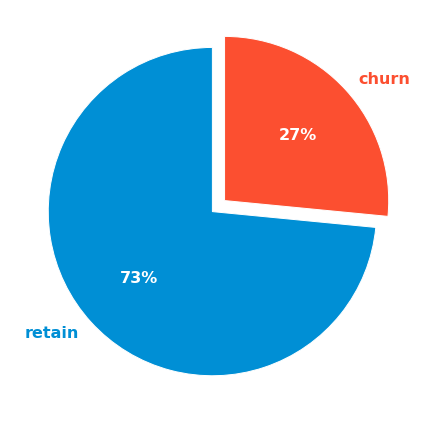

In [ ]:
pie_data = data_viz['churn'].value_counts(normalize=True).values * 100
pie_label = data_viz['churn'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()
plt.show()

## Why Did It Happen?
There are so many factors, but not all attributes have a strong relationship with customer's churn status.

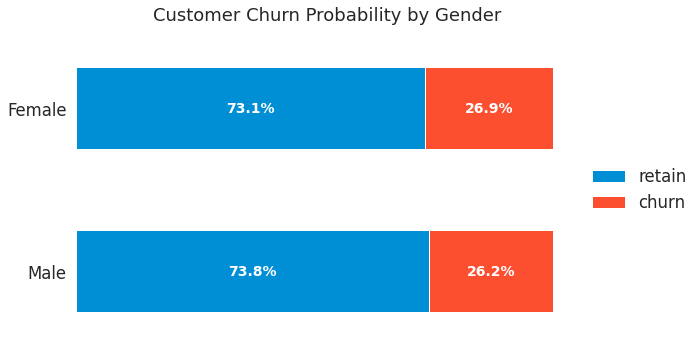

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

stacked_bar_plot(data=data_viz, x='gender', y='churn', ax=ax)

Both males and females almost have the same probability to churn. We can say that customer’s gender has no relationship with their churn status.

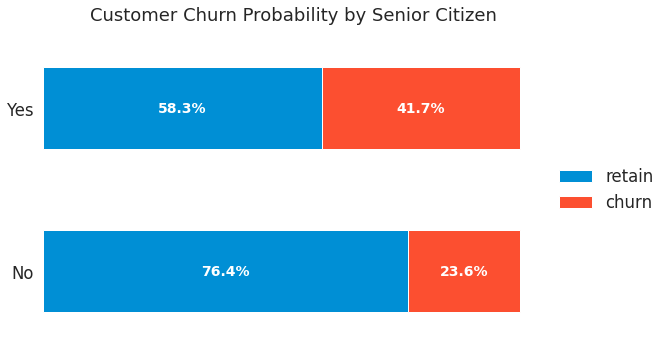

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

stacked_bar_plot(data=data_viz, x='senior_citizen', y='churn', ax=ax)

Senior citizens have a higher probability of churn than younger citizens. We can say this attribute has a relationship with churn status.

## Churn Probability

### All Categories

In [ ]:
columns = data_viz['churn']

attr_crosstab = pd.DataFrame()

for col in column_categorical:
  # create crosstab for each attribute
  index = data_viz[col]
  ct = pd.crosstab(index=index, columns=columns, normalize='index', colnames=[None]).reset_index()

  # add prefix to each category
  # format: column name (category)
  col_titleize = inflection.titleize(col)
  ct[col] = ct[col].apply(lambda x: f'{col_titleize} ({x})')

  # rename the column
  ct.rename(columns={col:'attribute'}, inplace=True)

  # create a single dataframe
  attr_crosstab = pd.concat([attr_crosstab, ct])

attr_crosstab = attr_crosstab.sort_values('churn', ascending=False).reset_index(drop=True)
attr_crosstab.style.background_gradient()

,attribute,churn,retain
0,Payment Method (Electronic check),0.452854,0.547146
1,Contract (Month-to-month),0.427097,0.572903
2,Internet Service (Fiber optic),0.418928,0.581072
3,Senior Citizen (Yes),0.416813,0.583187
4,Paperless Billing (Yes),0.335651,0.664349
5,Partner (No),0.329580,0.670420
6,Online Security (No),0.313296,0.686704
7,Dependents (No),0.312791,0.687209
8,Tech Support (No),0.311862,0.688138
9,Streaming Tv (Yes),0.300702,0.699298


### Top 5 Churn Probability

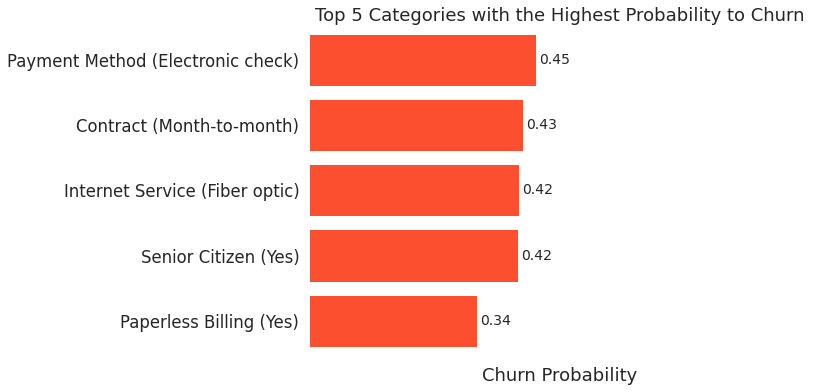

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=attr_crosstab.iloc[:5], x='churn', y='attribute', ax=ax, palette=['#FC4F30'], saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Highest Probability to Churn')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()

### Top 5 Retain Probability

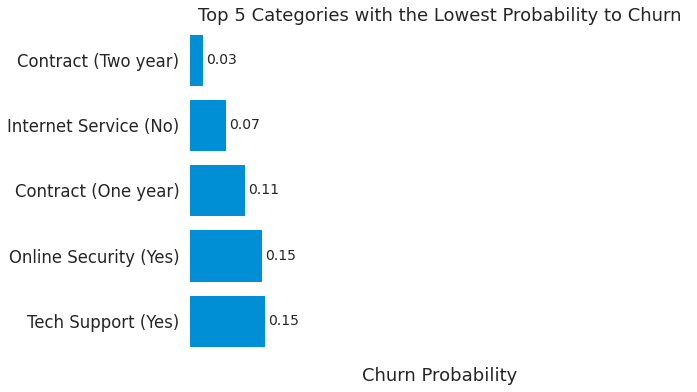

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=attr_crosstab.iloc[-5:].sort_values('churn'), x='churn', y='attribute', ax=ax, palette=['#008FD5'], saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Lowest Probability to Churn')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()

## How About The Numerical Data?

### Churn Probability by Tenure

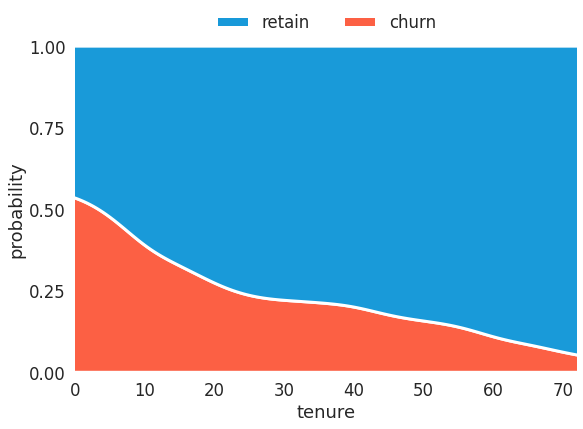

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(False, axis='x')
sns.kdeplot(data=data_viz, x='tenure', hue='churn', multiple='fill', linewidth=3, ax=ax, alpha=0.9)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), title='', ncol=2, frameon=False)

ax.set_xticks(np.arange(0,data_viz['tenure'].max(),10))
ax.set_xlim(data_viz['tenure'].min(),data_viz['tenure'].max())

ax.set_yticks(np.linspace(0,1,5))
ax.set_ylabel('probability')

sns.despine(left=True, bottom=True)

# ax.axis('tight')
plt.show()

It has a clear trend!<br>
I can say, tenure has a negative correlation with the probability of churn.
<br><br>
We can look at the short tenure (let's say the first 5 month), the probability of churn is quite high. I suspect that this is the time for new customers to try the services. Then, they consider whether they will continue to use the services or not.

### Tenure by Contract Type

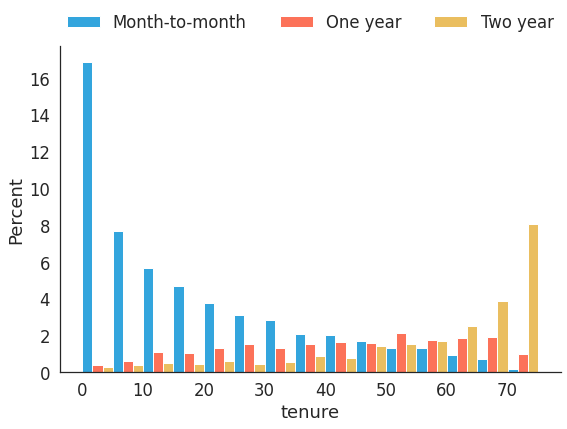

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=data_viz, x='tenure', hue='contract', stat='percent', multiple='dodge', ax=ax, binwidth=5, alpha=0.8)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

sns.despine()  
plt.show()

In the previous section (Churn Probability), I found that month-to-month contracts have a fairly high chance of churn. Morover, it's the second category with the highest probability to churn.
<br><br>
Here, I try to analyze the distribution of tenure based on the type of contract.
<br><br>
It can be seen that customers who take month-to-month contracts mostly have short tenures. There are around 25% of customers who have a month-to-month contract and tenure is less than 5 months.
<br><br>
This could be a new assumption:
- Short tenure means that the customer is still new to the service
- New customers have a tendency to take the shortest contract, i.e. month-to-month contract
<br><br>

It's like when we taste new food. We will try 1 spoon first, not immediately take 1 bowl. If it's good, we'll take more food. If it doesn't taste good, we definitely won't keep eating it. But this is an exception for people who really eat everything huh ~

### Churn Probability by Monthly Charges

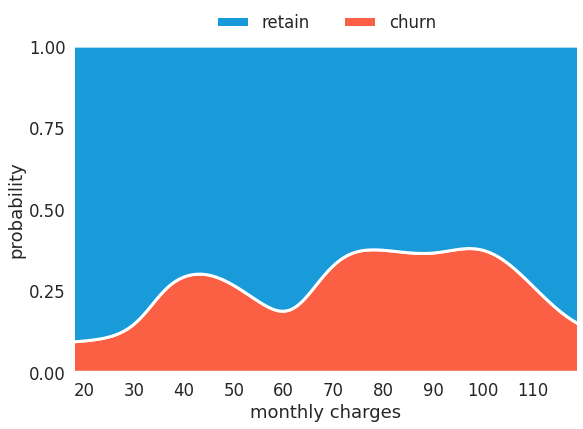

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(False, axis='x')
sns.kdeplot(data=data_viz, x='monthly_charges', hue='churn', multiple='fill', linewidth=3, ax=ax, alpha=0.9)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)

ax.set_xticks(np.arange(0,data_viz['monthly_charges'].max(),10))
ax.set_xlim(data_viz['monthly_charges'].min(),data_viz['monthly_charges'].max())

ax.set_yticks(np.linspace(0,1,5))
ax.set_ylabel('probability')
ax.set_xlabel('monthly charges')

sns.despine(left=True, bottom=True)

# ax.axis('tight')
plt.show()

It has no clear trend
<br><br>
As we can see, at 60 it goes down, suddenly goes up again, and then drops again when the monthly charges are more than 100.
<br><br>
It can be said that a high price also gets a worthy benefit so that customers feel "Ah, it's worth spending my precious money for this".
<br><br>
Even so, we can suggest the business team minimize this churn rate for some specific segments. For example, by adding certain privileges to customers who have high monthly charges.

## Attribute Associations to Churn Status
"Does this attribute have a strong relationship with churn status?"
<br><br>
To answer this question, I will calculate the association between attributes and target variable. Technically, association refers to any relationship between two variables, whereas correlation is often used to refer only to a linear relationship between two variables. ([Analyse-it](https://analyse-it.com/docs/user-guide/multivariate/correlation))
<br><br>
Cramer’s V is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic. ([Wikipedia](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V))
<br><br>
Shaked Zychlinski had made a clear explanation about the correlation between categorical features. You can read it on his [Medium](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9). He also writes his own library, you can find it on his [GitHub](https://github.com/shakedzy/dython). The documentation can be found [here](http://shakedzy.xyz/dython/).
<br><br>
In human language, this associations function is used to calculate the correlation between attributes using some scenarios:
- Numerical & numerical attributes (`num_num_assoc`), used to calculate numerical-numerical association using:
  - Pearson's R (`pearson`)
  - Spearman's R (`spearman`)
  - Kendall's Tau (`kendall`)
- Nominal & nominal attributes (`nom_nom_assoc`), used to calculate nominal-nominal association using:
  - Cramer's V (`cramer`)
  - Theil 's U (`theil`)
- Nominal & numerical attributes (`nom_num_assoc`), used to calculate nominal-numerical association using:
  - Correlation ratio (`correlation_ratio`)
<br><br>

I won't deep down the detailed explanation, you can read it on his Medium or package documentation.

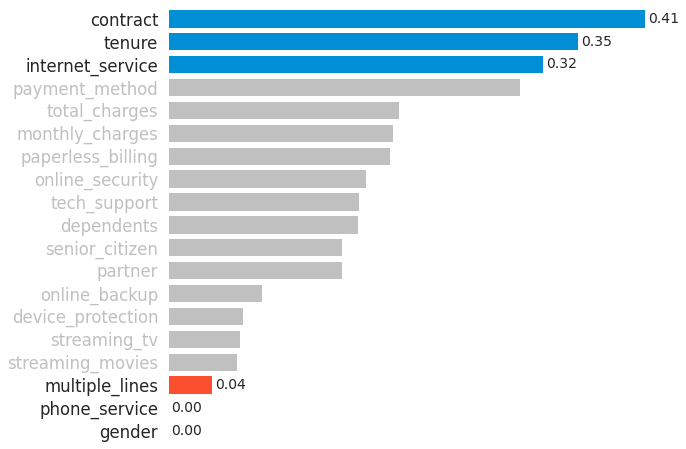

In [229]:
# calculate the associations (correlation) between features
associations_out = associations(data_viz,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['churn'].drop('churn').sort_values(ascending=False)

# custom palette top 5
threshold_top = 3
threshold_bot = corr_target.size - 3 - 1
palette = []
for i in range(0, len(corr_target)):
  if i < threshold_top:
    palette.append('#008FD5') # blue
  elif i > threshold_bot:
    palette.append('#FC4F30') # red
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax, palette=palette, saturation=1)
# ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if (i >= threshold_top) and (i <= threshold_bot):
    label.set_color('silver')

# custom bar label visibility
for con in ax.containers:
  # labels = [val for val in con.datavalues]
  labels = con.datavalues
  labels_len = len(labels)

  # masking the top 3 an bottom 3
  np.put(labels, np.arange(3,labels_len-3), [-1])
  
  # hide the labels for non-top 3 and non-bottom 3
  labels = [f'{val:.2f}' for val in labels]
  labels = [val if float(val) != -1 else '' for val in labels]

  ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()

Well, here we can see the association of each attribute with churn status, whether it's retain or churn.
<br><br>
As we can see, the type of contract, tenure, and internet service are the 3 attributes that have the strongest relationship to churn status.
<br><br>
Meanwhile, gender, phone service, and multiple lines are the 3 attributes that have the weakest relationship to churn status.
<br><br>
Always remember, "correlation is not causation". I'm just trying to figure out the relationship between the attributes and the target variable, not the causality between them.

# 5. Data Preprocessing

# 6. Model Development & Evaluation

# 7. Explainable AI

# 8. References
Analyse-it, Correlation and association ([Source](https://analyse-it.com/docs/user-guide/multivariate/correlation))

Wikipedia, Cramer's V ([Source](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V))

Shaked Zychlinski, The Search for Categorical Correlation ([Source](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9))